In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [4]:
df=pd.read_csv("Mall_Customers.csv")

In [5]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [8]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [9]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [10]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
x=df.iloc[:,1:]

In [12]:
ss=MinMaxScaler()

In [13]:
xx=['Age', 'Annual Income (k$)','Spending Score (1-100)']

In [14]:
df[xx]=ss.fit_transform(df[xx])

In [15]:
df=df.drop(columns="CustomerID")

In [16]:
val=df.iloc[:,1:]

In [17]:
val.dtypes

Age                       float64
Annual Income (k$)        float64
Spending Score (1-100)    float64
dtype: object

In [18]:
import warnings
warnings.filterwarnings("ignore")

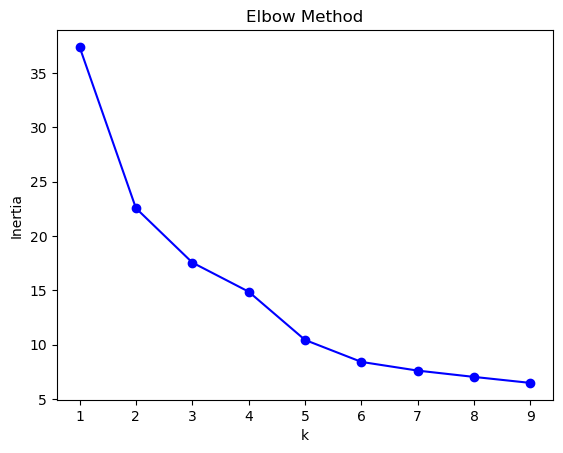

In [19]:
wcss = []  # Reset the list before running the loop
n = range(1, 10)

for k in n:
    kmean = KMeans(n_clusters=k, random_state=42)
    kmean.fit(val)
    wcss.append(kmean.inertia_)

plt.plot(list(n), wcss, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [20]:
print(len(n))
print(len(wcss))

9
9


In [21]:
kmean=KMeans(n_clusters=5, random_state=42)
kmean.fit(val)

KMeans(n_clusters=5, random_state=42)

In [22]:
Y=kmean.predict(val)

In [23]:
val

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959
...,...,...,...
195,0.326923,0.860656,0.795918
196,0.519231,0.909836,0.275510
197,0.269231,0.909836,0.744898
198,0.269231,1.000000,0.173469


In [24]:
plt.figure(figsize=(8, 5))
plt.scatter(val[Y==0,0], val[Y==0,1], s=50,c="green",label='cluster1')
plt.scatter(val[Y==1,0], val[Y==1,1], s=50,c="red",label='cluster2')
plt.scatter(val[Y==2,0], val[Y==2,1], s=50,c="blue",label='cluster3')
plt.scatter(val[Y==3,0], val[Y==3,1], s=50,c="yellow",label='cluster4')
plt.scatter(val[Y==4,0], val[Y==4,1], s=50,c="black",label='cluster5')
plt.scatter(kmeans.cluster_center_[:,0],kmeans.cluster_center_[:,1],s=100,c="cyan",label="centroid")
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.legend()
plt.show()


InvalidIndexError: (array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True,  True, False,  True,  True, False, False,  True,
        True, False,  True, False, False, False,  True, False,  True,
       False, False,  True,  True, False,  True, False,  True,  True,
        True,  True,  True, False, False, False, False, False,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False]), 0)

<Figure size 800x500 with 0 Axes>